# Importing Libraries

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns    
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [2]:
# Reading a CSV file("vechicle.csv") into a variable data
data = pd.read_csv("vechicle.csv")

In [3]:
data.head()    # Display the first few rows of the DataFrame to check the data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


# Checking for Statistics and information about the data

In [4]:
# Display a summary of the data, including the index dtype and column dtypes, non-null values, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data.describe()    # Display basic statistics summary of the data

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [6]:
data.isnull().sum()# Display the number of missing values in each column of the data and sum of the null values in each columndata.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [7]:
data.shape    # Get the number of rows and columns in the data

(398, 9)

In [14]:
# Get the data types of each column in the dataframe data
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [15]:
data.columns  # Display all the columns in the dataframe data

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

In [36]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [37]:
data['horsepower'] = data['horsepower'].replace('?','0')

In [40]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '0', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

# Checking for duplicates

In [41]:
data1 = data.duplicated().sum()   # To calculate the number of duplicate rows in the DataFrame and store it in the variable 'data1'
data1

0

# Converting text columns to numeric 

In [42]:
from sklearn.preprocessing import LabelEncoder
data2 = data.copy()
name = LabelEncoder()
data2['name'] = name.fit_transform(data2.name)
data2.head(5)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,49,7.652587
1,1,8,350.0,165,3693,11.5,1970,36,6.377156
2,1,8,318.0,150,3436,11.0,1970,231,7.652587
3,1,8,304.0,150,3433,12.0,1970,14,6.802299
4,1,8,302.0,140,3449,10.5,1970,161,7.227443


# Data visulaizations


# Strip Plot

C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

([<matplotlib.axis.XTick at 0x1d7dd3ca4d0>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

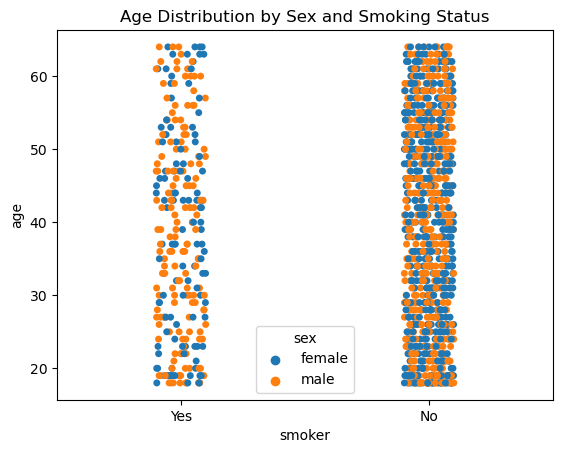

In [13]:
sns.stripplot(x=data.smoker,y=data.age,data=data,hue=data.sex)
plt.xlabel('smoker')
plt.ylabel('age')
plt.title('Age Distribution by Sex and Smoking Status')
plt.xticks([0, 1], ['Yes', 'No'])  # Rename the x-ticks

# Line Plots

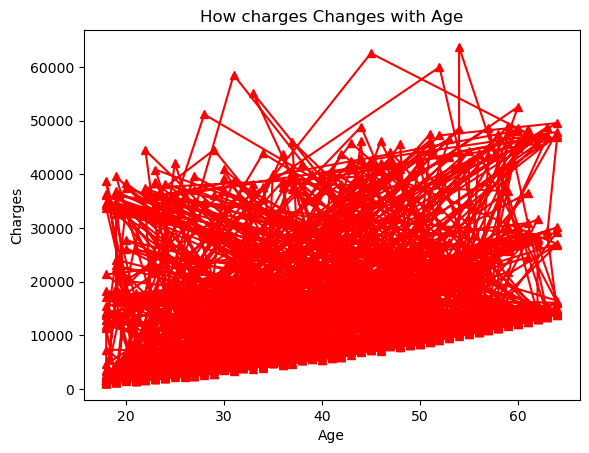

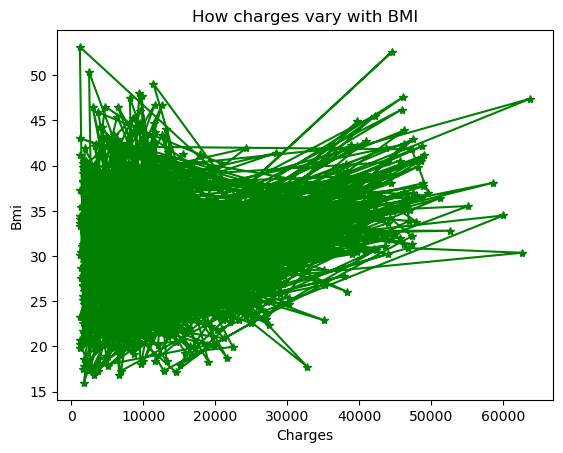

In [14]:
plt.plot(data['age'],data['charges'],color='r',marker='^')   #To see how BMI changes with age.
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('How charges Changes with Age')
plt.show()
plt.plot(data['charges'],data['bmi'],color='g',marker='*')
plt.xlabel('Charges')
plt.ylabel('Bmi')
plt.title('How charges vary with BMI')
plt.show()


# Histogram

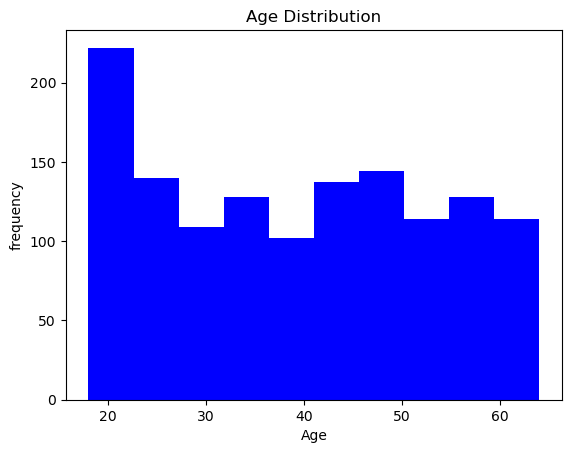

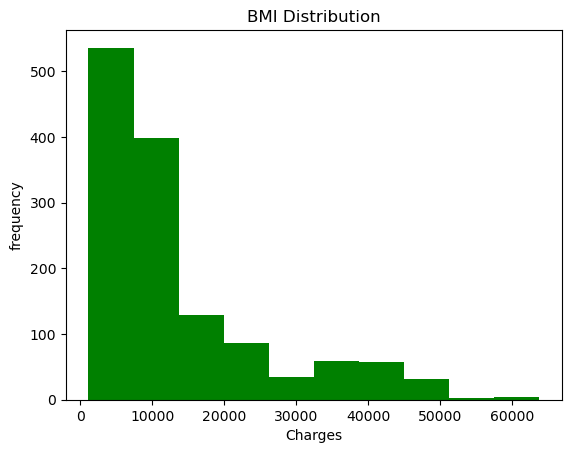

In [15]:
plt.hist(data['age'],color='blue')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Age Distribution')
plt.show()
plt.hist(data['charges'],color='green')
plt.xlabel('Charges')
plt.ylabel('frequency')
plt.title('BMI Distribution')
plt.show()

# Bar Plot

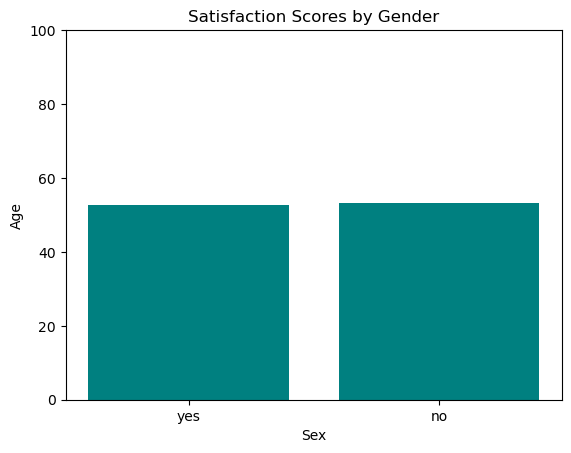

In [16]:
plt.bar(data['smoker'],data['bmi'],data=data,color='teal')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Satisfaction Scores by Gender')
plt.ylim(0,100)
plt.show()

# Piechart

In [17]:
data_geograph = data['region'].value_counts()
data_geograph

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [18]:
keys = data_geograph.keys().to_list()

In [19]:
count = data_geograph.to_list()

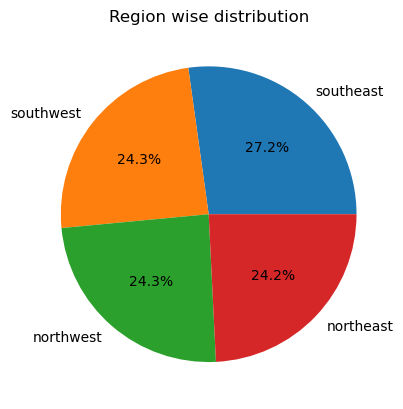

In [20]:
plt.pie(x=count,labels=keys,autopct='%1.1f%%')
plt.title('Region wise distribution')
plt.show()

# Scatter Plot

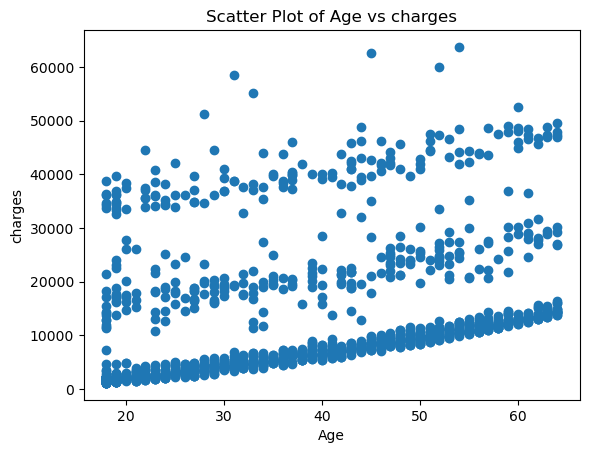

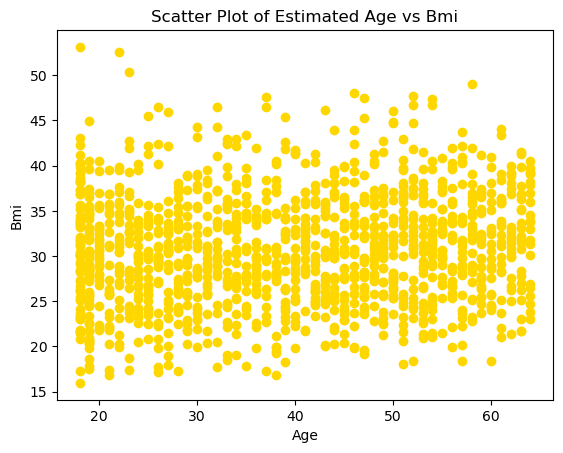

In [21]:
plt.scatter(data['age'], data['charges'])
plt.xlabel('Age')
plt.ylabel('charges')
plt.title('Scatter Plot of Age vs charges')
plt.show()
plt.scatter(data['age'], data['bmi'],color='gold')
plt.xlabel('Age')
plt.ylabel('Bmi')
plt.title('Scatter Plot of Estimated Age vs Bmi')
plt.show()

# Distribution Plot

C:\Users\deepa\AppData\Local\Temp\ipykernel_9588\3906197229.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'],color='gold')
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

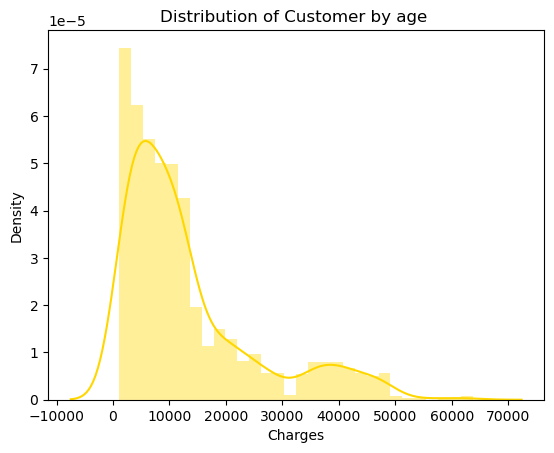

In [22]:
sns.distplot(data['charges'],color='gold')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Distribution of Customer by age ')
plt.show()

C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\deepa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

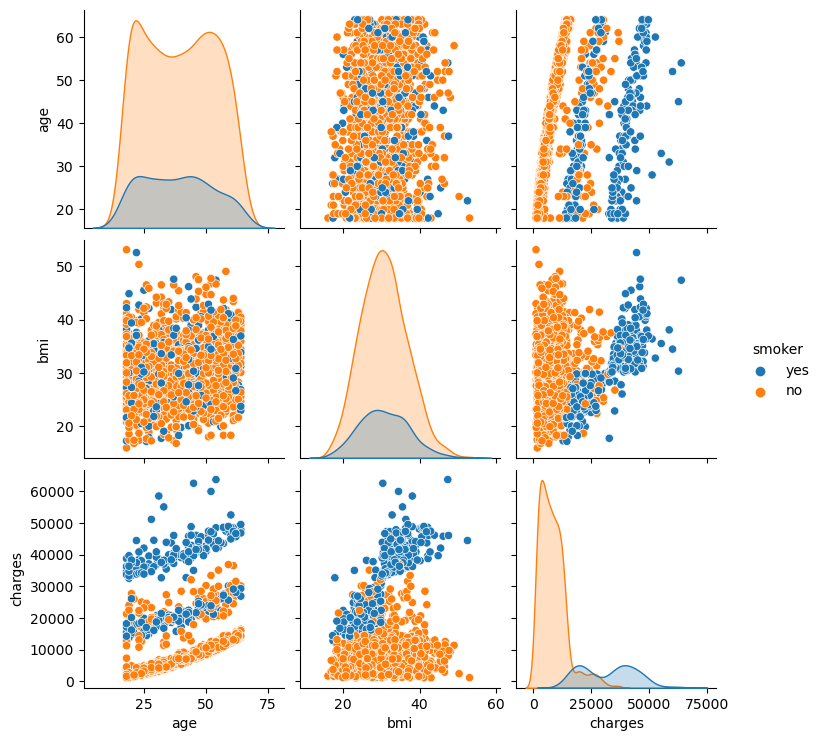

In [23]:
sns.pairplot(data=data, hue='smoker', vars=['age', 'bmi', 'charges'])
plt.show()   #This will create a grid of scatterplots that shows pairwise relationships between the continuous variables, with colors distinguishing between smokers and non-smokers.


# Heatmap

<Axes: >

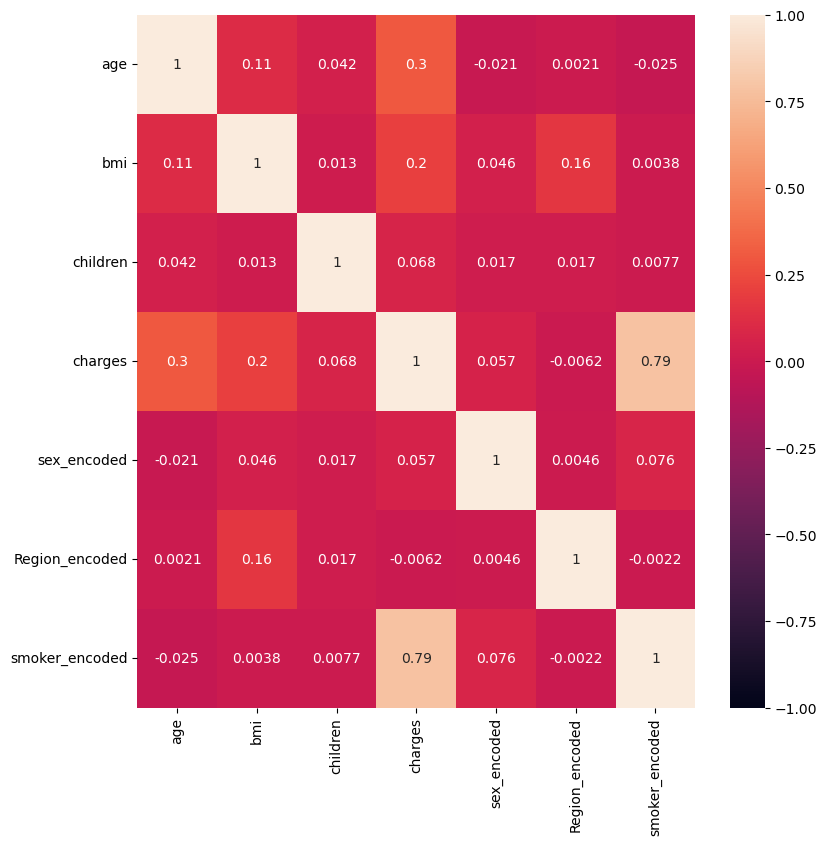

In [24]:
data_corr=data2.drop(columns=['region','sex','smoker'],axis=1)
plt.figure(figsize=(9,9))
sns.heatmap(data_corr.corr(),annot=True,cbar=True,vmin=-1,vmax=1,square=False)

In [43]:
data2.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

In [44]:
relation = data2[['origin', 'cylinders', 'displacement','horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter']].corr()
relation

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
origin,1.000000,-0.562543,-0.609409,-0.418636,-0.581024,0.205873,0.180662,0.360058,0.563450
cylinders,-0.562543,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746,-0.275754,-0.775396
displacement,-0.609409,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164,-0.292064,-0.804203
horsepower,-0.418636,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587,-0.227172,-0.754276
weight,-0.581024,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564,-0.255247,-0.831741
acceleration,0.205873,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137,0.128285,0.420289
year,0.180662,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000,0.074761,0.579267
name,0.360058,-0.275754,-0.292064,-0.227172,-0.255247,0.128285,0.074761,1.000000,0.273936
Kilometer_per_liter,0.563450,-0.775396,-0.804203,-0.754276,-0.831741,0.420289,0.579267,0.273936,1.000000


# Creating a Linear Regession Model

In [45]:
from sklearn.preprocessing import StandardScaler as ss


In [26]:
data3 = data2.copy()
data3 = data2.drop(columns=['region','sex','smoker'],axis=1)
charges_scalar = ss()
data3.head(10)

,age,bmi,children,charges,sex_encoded,Region_encoded,smoker_encoded
0,19,27.900,0,16884.92400,0,3,1
1,18,33.770,1,1725.55230,1,2,0
2,28,33.000,3,4449.46200,1,2,0
3,33,22.705,0,21984.47061,1,1,0
4,32,28.880,0,3866.85520,1,1,0
5,31,25.740,0,3756.62160,0,2,0
6,46,33.440,1,8240.58960,0,2,0
7,37,27.740,3,7281.50560,0,1,0
8,37,29.830,2,6406.41070,1,0,0
9,60,25.840,0,28923.13692,0,1,0


In [27]:
data2.head(10)

,age,sex,bmi,children,smoker,region,charges,sex_encoded,Region_encoded,smoker_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,3,1
1,18,male,33.770,1,no,southeast,1725.55230,1,2,0
2,28,male,33.000,3,no,southeast,4449.46200,1,2,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0
5,31,female,25.740,0,no,southeast,3756.62160,0,2,0
6,46,female,33.440,1,no,southeast,8240.58960,0,2,0
7,37,female,27.740,3,no,northwest,7281.50560,0,1,0
8,37,male,29.830,2,no,northeast,6406.41070,1,0,0
9,60,female,25.840,0,no,northwest,28923.13692,0,1,0


In [28]:
data3.charges = charges_scalar.fit_transform(data3[['charges']])
data3.head(5)

,age,bmi,children,charges,sex_encoded,Region_encoded,smoker_encoded
0,19,27.900,0,0.298584,0,3,1
1,18,33.770,1,-0.953689,1,2,0
2,28,33.000,3,-0.728675,1,2,0
3,33,22.705,0,0.719843,1,1,0
4,32,28.880,0,-0.776802,1,1,0


In [46]:
from sklearn.model_selection import train_test_split

In [48]:
# Split the data into training and testing sets
x = data2[['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name']]  # independent data
y = data2[['Kilometer_per_liter']]   #dependent data
x.head(5),y.head(5)

(   origin  cylinders  displacement horsepower  weight  acceleration  year  \
 0       1          8         307.0        130    3504          12.0  1970   
 1       1          8         350.0        165    3693          11.5  1970   
 2       1          8         318.0        150    3436          11.0  1970   
 3       1          8         304.0        150    3433          12.0  1970   
 4       1          8         302.0        140    3449          10.5  1970   
 
    name  
 0    49  
 1    36  
 2   231  
 3    14  
 4   161  ,
    Kilometer_per_liter
 0             7.652587
 1             6.377156
 2             7.652587
 3             6.802299
 4             7.227443)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=70)

In [52]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((278, 8), (120, 8), (278, 1), (120, 1))

# Training the model

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
# Initialize the model
model_lr = LinearRegression()

In [55]:
model_lr.fit(X_train, y_train)   # Train the model

LinearRegression()

In [56]:
# Make predictions
y_pred = model_lr.predict(X_test)

# Model Evaluation

In [57]:
model_lr.coef_*100    #The impact of each independent variable on the target variable.
#A positive coefficient indicates that as the feature increases, the charges also increase, 
#while a negative coefficient indicates the opposite.

array([[ 52.67037639, -14.85940616,   0.62440742,  -0.17760178,
         -0.2838009 ,   4.17380905,  31.2044557 ,   0.28542989]])

In [58]:
model_lr.intercept_   #Represents the intercept of the linear regression model. 
#It is the value of the target variable when all feature values are zero.

array([-600.20891831])

In [59]:
# Evaluate the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)   #R² Score: Values closer to 1 indicate a better fit.
r2

0.7892310536270709

In [60]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)   #error value
mse

2.1680597759885325

In [61]:
accuracy = 1-mse   #accuracy value
accuracy

-1.1680597759885325

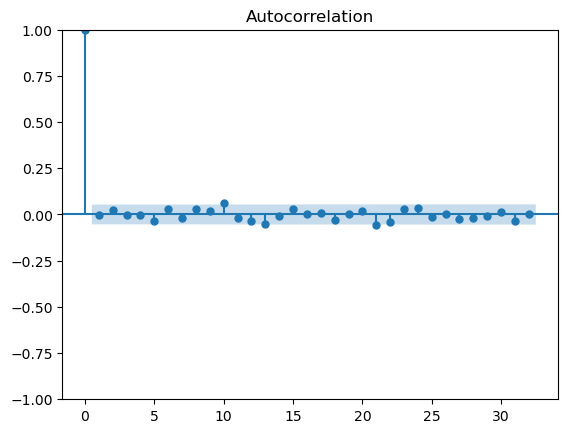

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data3['charges'])
plt.show()

In [61]:
import pandas as pd
import statsmodels.api as sm


# Define features and target
xc = data3[['age','sex_encoded','bmi','children','Region_encoded','smoker_encoded']]  
yc = data3[['charges']]

# Add a constant (intercept) to the features
Xc = sm.add_constant(xc)

# Initialize and fit the OLS model
model = sm.OLS(yc, Xc).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Mon, 02 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:53:47   Log-Likelihood:                -969.13
No. Observations:                1338   AIC:                             1952.
Df Residuals:                    1331   BIC:                             1989.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.0723      0.079    -26.